In [1]:
from qiskit import *
from qiskit.visualization import *

from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

import numpy as np
import matplotlib.pyplot as plt
import math

sim = Aer.get_backend('qasm_simulator')

# using tikzplotlib to export plot to latex
import tikzplotlib

def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

def save_fig(name, width='10cm', height='10cm'):
    fig = plt.gcf()
    tikzplotlib_fix_ncols(fig)

    tikzplotlib.clean_figure()
    tikzplotlib.save(name + '.tex', axis_width=width, axis_height=height)

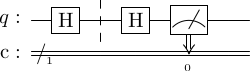

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q} :  } & \lstick{{q} :  } & \gate{\mathrm{H}} \barrier[0em]{0} & \qw & \gate{\mathrm{H}} & \meter & \qw & \qw\\
	 	\nghost{\mathrm{{c} :  }} & \lstick{\mathrm{{c} :  }} & \lstick{/_{_{1}}} \cw & \cw & \cw & \dstick{_{_{\hspace{0.0em}0}}} \cw \ar @{<=} [-1,0] & \cw & \cw\\
\\ }}
\end{document}


In [2]:
qc = QuantumCircuit(1,1)
# Alice prepares qubit in state |+>
qc.h(0)
qc.barrier()
# Alice now sends the qubit to Bob
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
print(qc.draw(output='latex_source'))

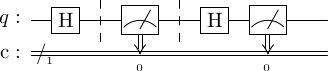

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q} :  } & \lstick{{q} :  } & \gate{\mathrm{H}} \barrier[0em]{0} & \qw & \meter \barrier[0em]{0} & \qw & \gate{\mathrm{H}} & \meter & \qw & \qw\\
	 	\nghost{\mathrm{{c} :  }} & \lstick{\mathrm{{c} :  }} & \lstick{/_{_{1}}} \cw & \cw & \dstick{_{_{\hspace{0.0em}0}}} \cw \ar @{<=} [-1,0] & \cw & \cw & \dstick{_{_{\hspace{0.0em}0}}} \cw \ar @{<=} [-1,0] & \cw & \cw\\
\\ }}
\end{document}


In [3]:
qc = QuantumCircuit(1,1)
# Alice prepares qubit in state |+>
qc.h(0)
# Alice now sends the qubit to Bob
# but Eve intercepts and tries to read it
qc.barrier()
qc.measure(0, 0)
qc.barrier()
# Eve then passes this on to Bob
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
print(qc.draw(output='latex_source'))